<a href="https://colab.research.google.com/github/IE-304/IE-304/blob/main/5.3_MLR_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Created on Sun Nov 10 23:02:46 2024

@author: @author: 元智大學工業工程與管理學系, 鄭春生 教授
"""
import warnings
warnings.filterwarnings("ignore")
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

以固定比例，將一個資料集分成訓練檔和測試檔，適用於資料有時間性。

In [2]:
#Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/IE-304/IE-304/refs/heads/main/5.0_Advertising.csv")
DS=len(df) #數據個數

In [3]:
# Machine Learning Approach
# Splitting the dataset
train_size = int(DS*0.7)
df_train = df.iloc[0:train_size,:]
df_test = df.iloc[train_size:DS,:]

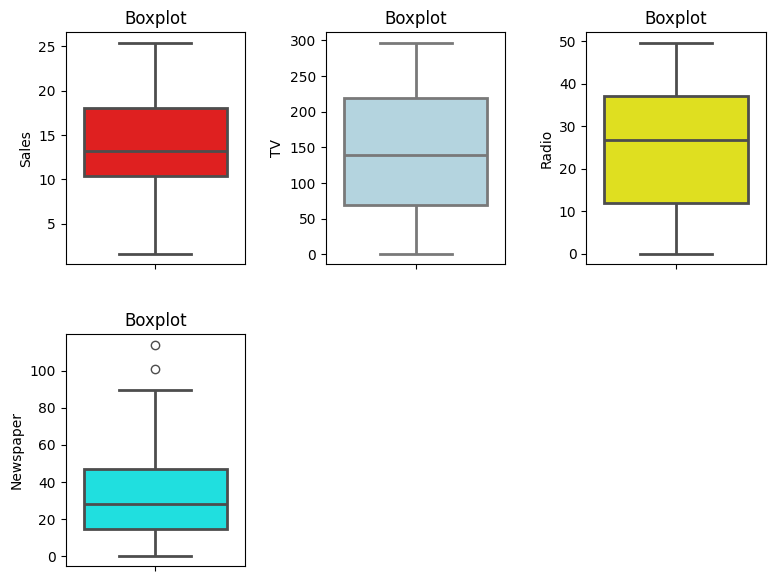

In [4]:
#Box plot- Training Data only
plt.figure(figsize=(8,6))
plt.subplots_adjust(top=1, right=1, hspace=0.3, wspace=0.45)
plt.subplot(2,3,1)
sns.boxplot(data=df_train, y="Sales", orient='v', color='red',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,2)
sns.boxplot(data=df_train, y="TV", orient='v', color='lightblue',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,3)
sns.boxplot(data=df_train, y="Radio", orient='v', color='yellow',linewidth=2, width=0.8).set(title='Boxplot')
plt.subplot(2,3,4)
sns.boxplot(data=df_train, y="Newspaper", orient='v', color='cyan',linewidth=2, width=0.8).set(title='Boxplot')
plt.show()

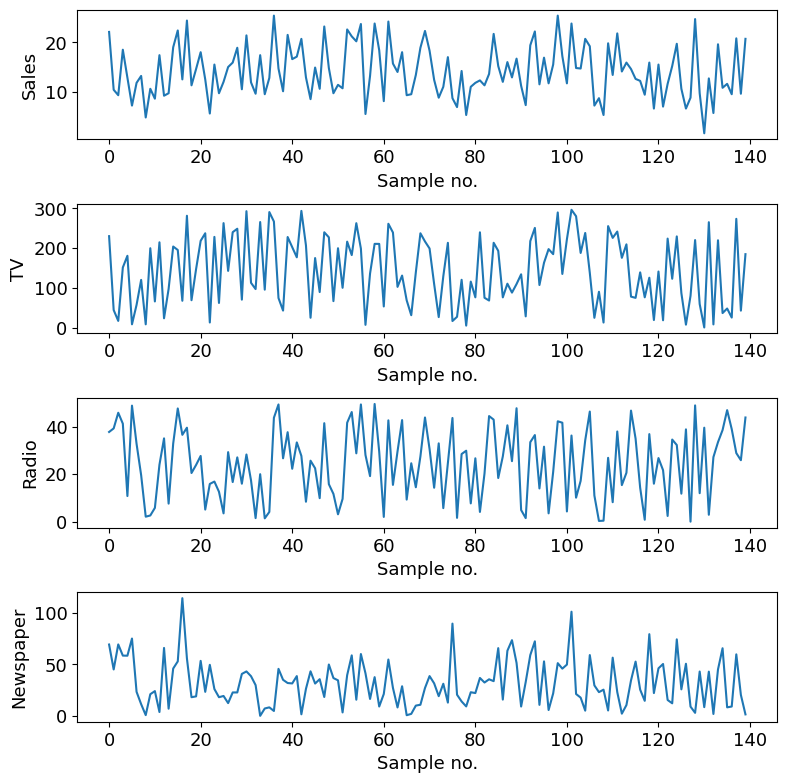

In [5]:
#Line Plot- Training Data only
FS=13
plt.figure(figsize=(8,8))
plt.subplots_adjust(top=1, right=1, hspace=0.5, wspace=0.45)
plt.subplot(4,1,1)
plt.plot(df_train['Sales'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Sales', fontsize=FS)
plt.subplot(4,1,2)
plt.plot(df_train['TV'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('TV', fontsize=FS)
plt.subplot(4,1,3)
plt.plot(df_train['Radio'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Radio', fontsize=FS)
plt.subplot(4,1,4)
plt.plot(df_train['Newspaper'])
plt.xticks(fontsize=FS)
plt.xlabel('Sample no.', fontsize=FS)
plt.yticks(fontsize=FS)
plt.ylabel('Newspaper', fontsize=FS)
plt.show()

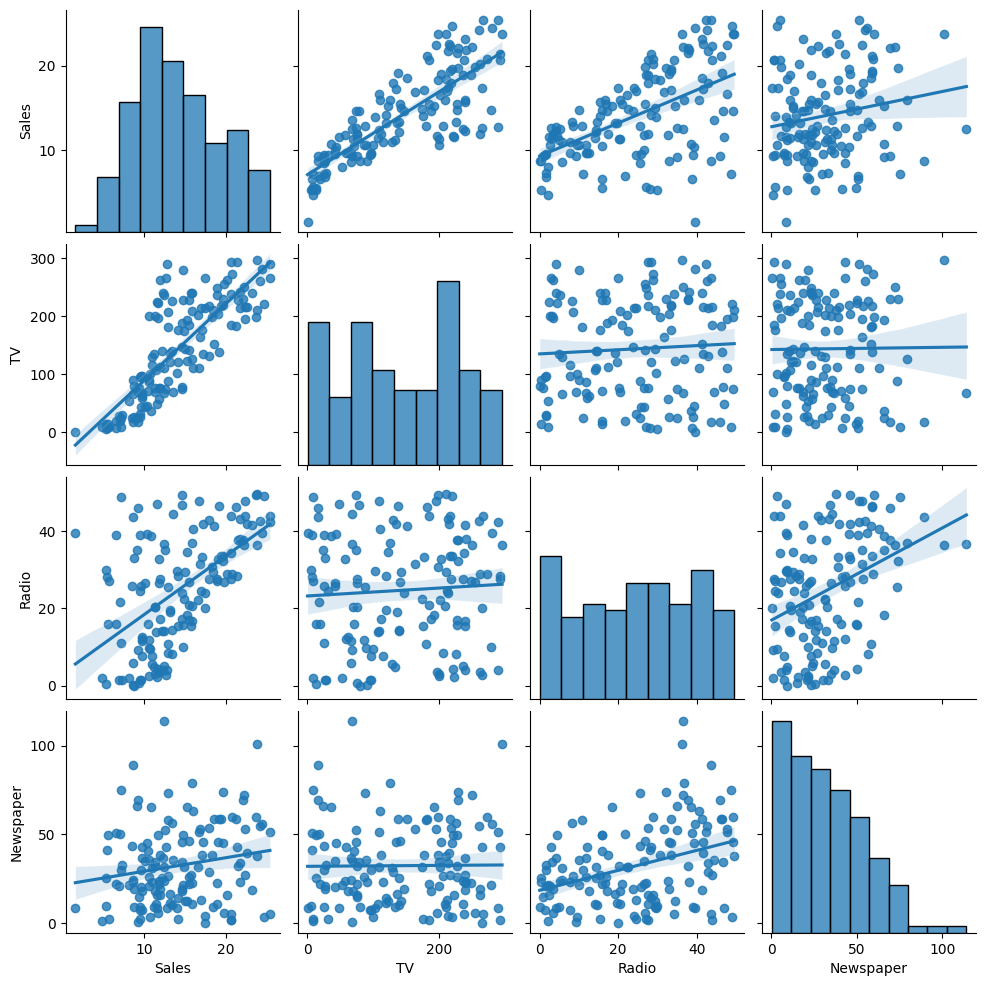

In [6]:
# Matrix plot
sns.pairplot(df_train[['Sales','TV', 'Radio', 'Newspaper']], kind='reg')
sns.set(font_scale=1.25)
plt.show()

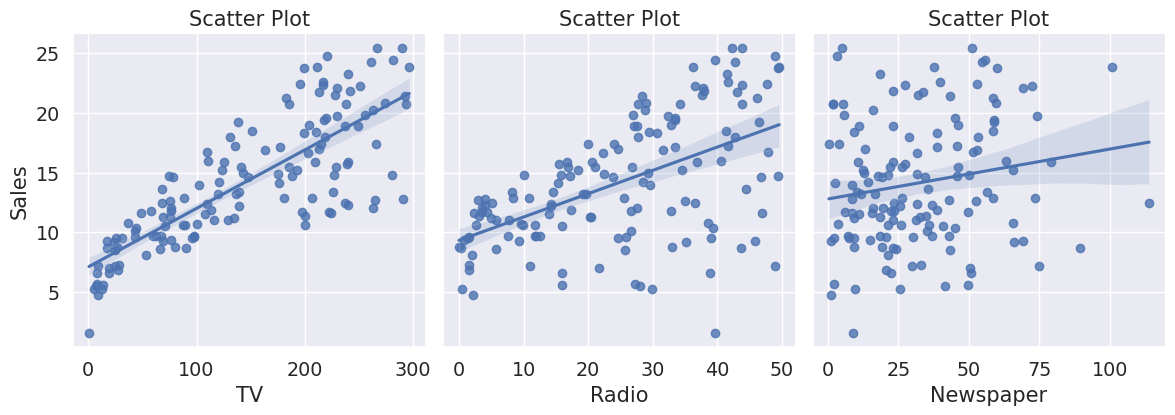

In [7]:
ax=sns.pairplot(df_train, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
                height=4, aspect=1.0, kind='reg')
ax.set(title='Scatter Plot')
plt.show()

In [8]:
# Print correlation coefficients
matrix = df_train.corr()
print("Correlation matrix is : ")
print(matrix.round(decimals=3))

Correlation matrix is : 
            Unnamed: 0     TV  Radio  Newspaper  Sales
Unnamed: 0       1.000 -0.071  0.030     -0.063 -0.048
TV              -0.071  1.000  0.060      0.010  0.805
Radio            0.030  0.060  1.000      0.366  0.544
Newspaper       -0.063  0.010  0.366      1.000  0.178
Sales           -0.048  0.805  0.544      0.178  1.000


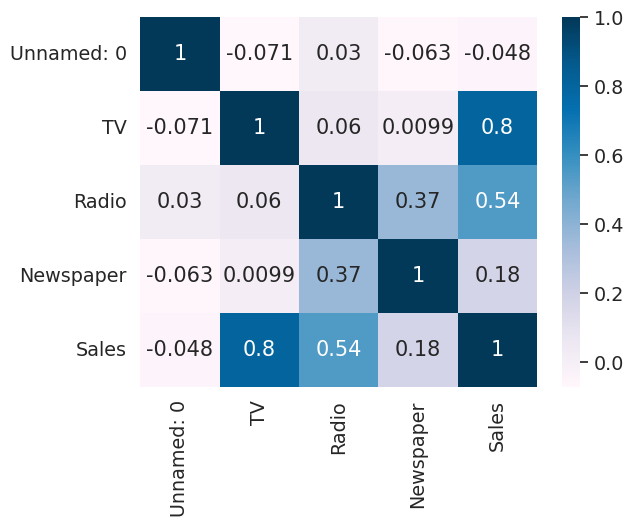

"\n# 只用一次項\nX_train = df_train[['TV', 'Radio', 'Newspaper']]\ny_train = df_train['Sales']\nX_test = df_test[['TV', 'Radio', 'Newspaper']]\ny_test = df_test['Sales']\n"

In [9]:
# Plotting correlation matrix
sns.heatmap(matrix, cmap="PuBu", annot=True) #Blues, Greens
# Display the plot
plt.show()
'''
# 只用一次項
X_train = df_train[['TV', 'Radio', 'Newspaper']]
y_train = df_train['Sales']
X_test = df_test[['TV', 'Radio', 'Newspaper']]
y_test = df_test['Sales']
'''
#加入交互作用

In [10]:
df_train['TVRadio']= df_train['TV']*df_train['Radio']
X_train = df_train[['TV', 'Radio', 'Newspaper', 'TVRadio']]
df_test['TVRadio']= df_test['TV']*df_test['Radio']
X_test = df_test[['TV', 'Radio', 'Newspaper', 'TVRadio']]
y_train = df_train['Sales']
y_test = df_test['Sales']

In [11]:
#Fitting the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
#Prediction of test set
y_pred= model.predict(X_test)

In [13]:
#Predicted values
print("Prediction for test set:\n{}".format(y_pred))
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
mlr_diff.head()

Prediction for test set:
[ 9.97102143 19.04647804 19.89749532  9.63812902 10.61780172  9.76240259
 13.36424726 25.83054376 10.12219035  9.54618747 16.74490911 10.50882131
 16.14630493 18.548915   15.18599468  7.22411709 14.19784856  9.8884989
  8.43554359 12.45107347 13.96341678 12.74169131 14.56170939 17.37303876
 11.23383772 12.33619048  8.76328319 11.98399158 17.14764863 15.65011846
  8.69823515 14.28134524  8.10573106 11.43896334 11.85272936 28.2629011
 20.49471959 11.70239526 12.7166106  11.98048564 10.22996913 12.34315519
  8.43149174 27.10567182 18.07959454 21.97205445  9.83483561 17.14249626
 16.82377928  7.75511631 10.25119723  9.37391404  7.41245248 18.64203346
 16.31865086  7.81276636  9.20110039 12.12877864 26.48232859 13.51922186]


,Actual value,Predicted value
140,10.9,9.971021
141,19.2,19.046478
142,20.1,19.897495
143,10.4,9.638129
144,11.4,10.617802


In [14]:
#Model Evaluation
R2score = r2_score(y_test, y_pred)
R2score1 = model.score(X_test, y_test)
R2score2 = explained_variance_score(y_test, y_pred, force_finite=False)
meanAbErr = mean_absolute_error(y_test, y_pred)
meanSqErr = mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(mean_squared_error(y_test, y_pred))
print('R squared: %.3f' %R2score)
print('R squared1: %.3f' %R2score1)
print('R squared2: %.3f' %R2score2)
print('Mean Absolute Error: %.4f' %meanAbErr)
print('Mean Square Error: %.4f' %meanSqErr)
print('Root Mean Square Error: %.4f' %rootMeanSqErr)

R squared: 0.973
R squared1: 0.973
R squared2: 0.973
Mean Absolute Error: 0.6175
Mean Square Error: 0.6857
Root Mean Square Error: 0.8281


In [15]:
y_pred= model.predict(X_test)
sample_no=len(y_pred)
LW=2; FS=16

Residual:0.009


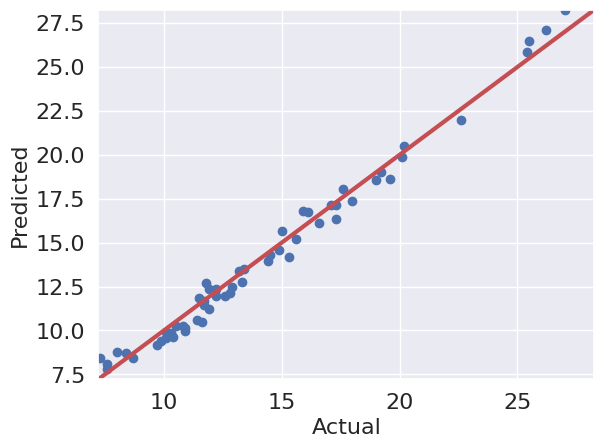

In [16]:
residual=y_test-y_pred
print('Residual:%.3f' %residual.mean()) # residual 的平均數
linestart=y_pred.min()
lineend=y_pred.max()
plt.scatter(y_test, y_pred)
plt.plot([linestart, lineend], [linestart, lineend], color='r', lw=3)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlim(linestart, lineend)
plt.ylim(linestart, lineend)
plt.xlabel('Actual', fontsize=FS)
plt.ylabel('Predicted', fontsize=FS)
plt.show()

In [17]:
# Normality test of residuals using Anderson-Darling test
import statsmodels.api as sm
[AD2, pvalue]=sm.stats.diagnostic.normal_ad(residual)
print('\nAnderson Darling test statistic: %.4f' % AD2)
print ('P-Value: %.4f' % pvalue)


Anderson Darling test statistic: 1.6738
P-Value: 0.0002


In [18]:
# Residual Plot Four-in-One
from scipy.stats import probplot

In [19]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(top=0.9, right=1, hspace=0.5, wspace=0.3)
plt.suptitle('Residual Plots', fontsize=FS+2)

Text(0.5, 0.98, 'Residual Plots')

<Figure size 1000x800 with 0 Axes>

Text(0, 0.5, 'Residuals')

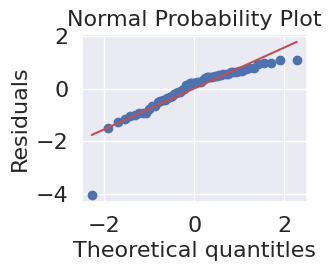

In [20]:
plt.subplot(2,2,1)
rawdata=np.array(residual, dtype=float)
probplot(rawdata, dist='norm', fit=True, plot=plt)
plt.title('Normal Probability Plot', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Theoretical quantitles', fontsize=FS)
plt.ylabel('Residuals', fontsize=FS)

Text(0, 0.5, 'Residual')

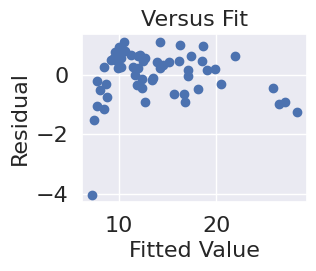

In [21]:
plt.subplot(2,2,2)
plt.scatter(y_pred, residual)
plt.title('Versus Fit', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Fitted Value', fontsize=FS)
plt.ylabel('Residual', fontsize=FS)

Text(0, 0.5, 'Frequency')

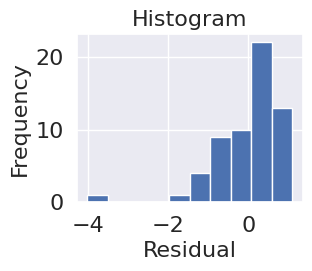

In [22]:
plt.subplot(2,2,3)
plt.hist(residual)
plt.title('Histogram', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Residual', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)

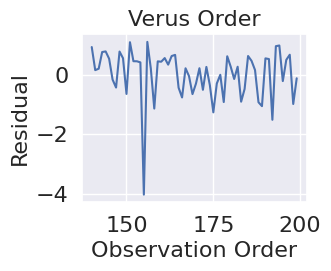

In [23]:
plt.subplot(2,2,4)
plt.plot(residual)
plt.title('Verus Order', fontsize=FS)
plt.xticks(fontsize=FS)
plt.yticks(fontsize=FS)
plt.xlabel('Observation Order', fontsize=FS)
plt.ylabel('Residual', fontsize=FS)
plt.show()